In [1]:

def naive_mult(x, y): 
     return x * y

def karatsuba(x, y): 
        # Base case: if numbers are small, just multiply directly
    if x < 10 or y < 10:
        return x * y

    # Calculate the size of the numbers
    n = max(len(str(x)), len(str(y)))
    m = n // 2  # midpoint

    # Split the numbers
    high_x, low_x = divmod(x,10**m)
    high_y, low_y = divmod(y,10**m)

    # Recursive multiplications
    C = karatsuba(high_x, high_y)        # w * y
    D = karatsuba(low_x, low_y)          # x * z
    E = karatsuba(high_x + low_x, high_y + low_y) - C - D  # cross terms

    # Recombine
    return C * 10**(2*m) + E * 10**m + D


# Example test
a = 12345678901234567890
b = 98765432109876543210

print("Naive:", naive_mult(a, b))
print("Karatsuba:", karatsuba(a, b))
print("Equal?", naive_mult(a, b) == karatsuba(a, b))





Naive: 1219326311370217952237463801111263526900
Karatsuba: 1219326311370217952237463801111263526900
Equal? True


a=99, b=88
Size 2: Naive ans = 8712, Karatsuba ans = 8712, Equal? True
 Naive ops = 4, Karatsuba ops = 9

a=9999, b=8888
Size 4: Naive ans = 88871112, Karatsuba ans = 88871112, Equal? True
 Naive ops = 16, Karatsuba ops = 36

a=99999999, b=88888888
Size 8: Naive ans = 8888888711111112, Karatsuba ans = 8888888711111112, Equal? True
 Naive ops = 64, Karatsuba ops = 122

a=9999999999999999, b=8888888888888888
Size 16: Naive ans = 88888888888888871111111111111112, Karatsuba ans = 88888888888888871111111111111112, Equal? True
 Naive ops = 256, Karatsuba ops = 389

a=99999999999999999999999999999999, b=88888888888888888888888888888888
Size 32: Naive ans = 8888888888888888888888888888888711111111111111111111111111111112, Karatsuba ans = 8888888888888888888888888888888711111111111111111111111111111112, Equal? True
 Naive ops = 1024, Karatsuba ops = 1195

a=9999999999999999999999999999999999999999999999999999999999999999, b=8888888888888888888888888888888888888888888888888888888888888888
Size 6

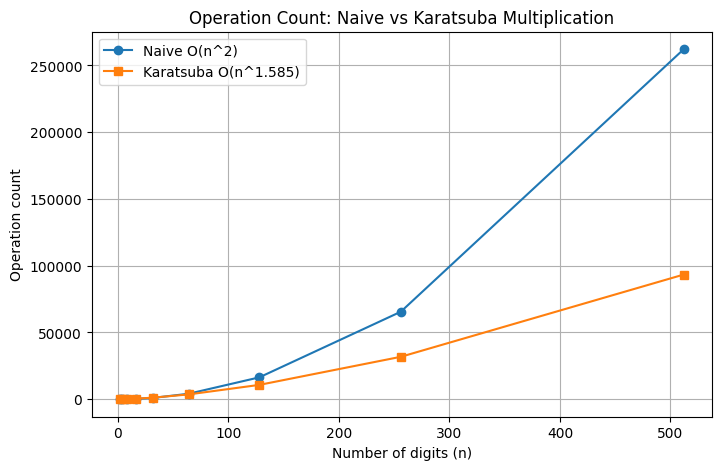

In [6]:
import matplotlib.pyplot as plt

def naive_mult(x, y):
    
    x_str, y_str = str(x), str(y)
    n, m = len(x_str), len(y_str)
    ops = n * m  
    return x * y, ops


def karatsuba(x, y):
    
    
    if x < 10 or y < 10:
        return x * y, 1 

    n = max(len(str(x)), len(str(y)))
    m = n // 2


    high_x, low_x = divmod(x, 10**m)
    high_y, low_y = divmod(y, 10**m)


    C, opsC = karatsuba(high_x, high_y)
    D, opsD = karatsuba(low_x, low_y)
    E, opsE = karatsuba(high_x + low_x, high_y + low_y)


    E = E - C - D
    ops = opsC + opsD + opsE + n  

    
    result = C * 10**(2*m) + E * 10**m + D
    return result, ops



sizes = [2**i for i in range(1, 10)]  
naive_counts, karatsuba_counts = [], []

for n in sizes:
    a = int("9" * n)  
    b = int("8" * n)  
    
    ans_naive, ops_naive = naive_mult(a, b)
    ans_karatsuba, ops_karatsuba = karatsuba(a, b)
    print(f"a={a}, b={b}")
    naive_counts.append(ops_naive)
    karatsuba_counts.append(ops_karatsuba)
    print(f"Size {n}: Naive ans = {ans_naive}, Karatsuba ans = {ans_karatsuba}, Equal? {ans_naive == ans_karatsuba}")
    print(f" Naive ops = {ops_naive}, Karatsuba ops = {ops_karatsuba}\n")
# Plot
plt.figure(figsize=(8, 5))
plt.plot(sizes, naive_counts, marker='o', label="Naive O(n^2)")
plt.plot(sizes, karatsuba_counts, marker='s', label="Karatsuba O(n^1.585)")
plt.xlabel("Number of digits (n)")
plt.ylabel("Operation count")
plt.title("Operation Count: Naive vs Karatsuba Multiplication")
plt.legend()
plt.grid(True)
plt.show()


Digits: 2 → Naive Ops: 4, Karatsuba Ops: 9, Match: True
Digits: 4 → Naive Ops: 16, Karatsuba Ops: 36, Match: True
Digits: 8 → Naive Ops: 64, Karatsuba Ops: 122, Match: True
Digits: 16 → Naive Ops: 256, Karatsuba Ops: 389, Match: True
Digits: 32 → Naive Ops: 1024, Karatsuba Ops: 1195, Match: True
Digits: 64 → Naive Ops: 4096, Karatsuba Ops: 3602, Match: True
Digits: 128 → Naive Ops: 16384, Karatsuba Ops: 10744, Match: True
Digits: 256 → Naive Ops: 65536, Karatsuba Ops: 31775, Match: True
Digits: 512 → Naive Ops: 262144, Karatsuba Ops: 93369, Match: True


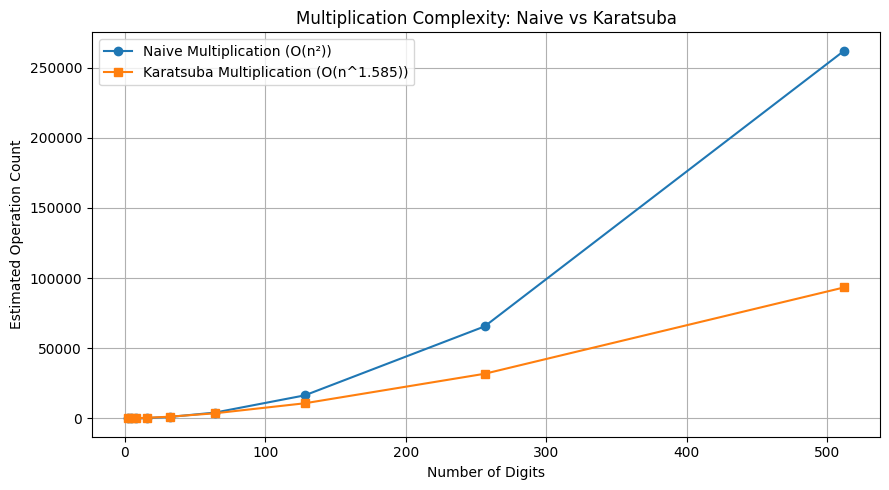

In [5]:
import matplotlib.pyplot as plt


def naive_multiply(x, y):
    x_str, y_str = str(x), str(y)
    digits_x, digits_y = len(x_str), len(y_str)
    total_ops = digits_x * digits_y  # Each digit of x multiplies with each digit of y
    return x * y, total_ops

def karatsuba_count(x, y):
    if x < 10 or y < 10:
        return x * y, 1  

    max_len = max(len(str(x)), len(str(y)))
    half = max_len // 2

    
    x_high, x_low = divmod(x, 10**half)
    y_high, y_low = divmod(y, 10**half)

    
    prod_high, ops_high = karatsuba_count(x_high, y_high)
    prod_low, ops_low = karatsuba_count(x_low, y_low)
    prod_mix, ops_mix = karatsuba_count(x_high + x_low, y_high + y_low)

    # Middle term: (x_high + x_low)*(y_high + y_low) - prod_high - prod_low
    cross_term = prod_mix - prod_high - prod_low
    total_ops = ops_high + ops_low + ops_mix + max_len  # Add cost of additions/subtractions

    # Final result reconstruction
    result = prod_high * 10**(2 * half) + cross_term * 10**half + prod_low
    return result, total_ops

# 📊 Benchmarking Across Input Sizes
digit_sizes = [2**i for i in range(1, 10)]  # 2, 4, 8, ..., 512 digits
ops_naive_list, ops_karatsuba_list = [], []

for digits in digit_sizes:
    num1 = int("9" * digits)  # e.g., 999...9
    num2 = int("8" * digits)  # e.g., 888...8

    result_naive, ops_naive = naive_multiply(num1, num2)
    result_karatsuba, ops_karatsuba = karatsuba_count(num1, num2)

    print(f"Digits: {digits} → Naive Ops: {ops_naive}, Karatsuba Ops: {ops_karatsuba}, Match: {result_naive == result_karatsuba}")

    ops_naive_list.append(ops_naive)
    ops_karatsuba_list.append(ops_karatsuba)

# 📈 Visualization
plt.figure(figsize=(9, 5))
plt.plot(digit_sizes, ops_naive_list, marker='o', label="Naive Multiplication (O(n²))")
plt.plot(digit_sizes, ops_karatsuba_list, marker='s', label="Karatsuba Multiplication (O(n^1.585))")
plt.xlabel("Number of Digits")
plt.ylabel("Estimated Operation Count")
plt.title("Multiplication Complexity: Naive vs Karatsuba")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
def classical_dc(x, y):
    """Classical divide & conquer multiplication with operation counting.
       Uses 4 recursive multiplications.
    """
    # Base case: single-digit multiplication
    if x < 10 or y < 10:
        return x * y, 1  # one operation

    n = max(len(str(x)), len(str(y)))
    m = n // 2

    # Split numbers
    high_x, low_x = divmod(x, 10**m)
    high_y, low_y = divmod(y, 10**m)

    # Recursive multiplications (4 of them)
    P1, ops1 = classical_dc(high_x, high_y)  # w*y
    P2, ops2 = classical_dc(high_x, low_y)   # w*z
    P3, ops3 = classical_dc(low_x, high_y)   # x*y
    P4, ops4 = classical_dc(low_x, low_y)    # x*z

    # Combine results
    result = P1 * 10**(2*m) + (P2 + P3) * 10**m + P4
    ops = ops1 + ops2 + ops3 + ops4 + n  # n extra for additions

    return result, ops


# ✅ Example usage:
a = 12345678
b = 87654321

res, ops = classical_dc(a, b)
print("Classical DC result:", res)
print("Operations counted:", ops)
print("Matches Python built-in?", res == a * b)


Classical DC result: 1082152022374638
Operations counted: 120
Matches Python built-in? True


a: 99, b: 88
Size 2: Classical ans = 8712, Karatsuba ans = 8712, Equal? True
 Classical ops = 6, Karatsuba ops = 9

For size 2, Karatsuba is more expensive than Classical DC.
a: 9999, b: 8888
Size 4: Classical ans = 88871112, Karatsuba ans = 88871112, Equal? True
 Classical ops = 28, Karatsuba ops = 36

For size 4, Karatsuba is more expensive than Classical DC.
a: 99999999, b: 88888888
Size 8: Classical ans = 8888888711111112, Karatsuba ans = 8888888711111112, Equal? True
 Classical ops = 120, Karatsuba ops = 122

For size 8, Karatsuba is more expensive than Classical DC.
a: 9999999999999999, b: 8888888888888888
Size 16: Classical ans = 88888888888888871111111111111112, Karatsuba ans = 88888888888888871111111111111112, Equal? True
 Classical ops = 496, Karatsuba ops = 389

For size 16, Classical DC is more expensive than Karatsuba.
a: 99999999999999999999999999999999, b: 88888888888888888888888888888888
Size 32: Classical ans = 8888888888888888888888888888888711111111111111111111111111

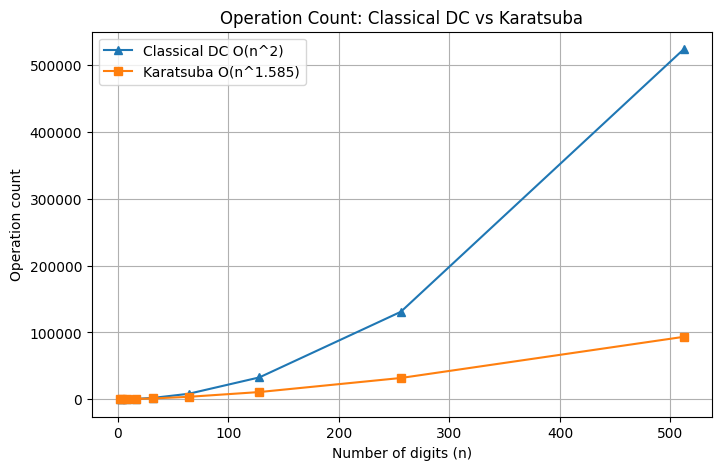

In [11]:
import matplotlib.pyplot as plt


def classical_dc(x, y):
    
    if x < 10 or y < 10:
        return x * y, 1  

    n = max(len(str(x)), len(str(y)))
    m = n // 2
    high_x, low_x = divmod(x, 10**m)
    high_y, low_y = divmod(y, 10**m)

    
    P1, ops1 = classical_dc(high_x, high_y)  
    P2, ops2 = classical_dc(high_x, low_y)   
    P3, ops3 = classical_dc(low_x, high_y)   
    P4, ops4 = classical_dc(low_x, low_y)    

    result = P1 * 10**(2*m) + (P2 + P3) * 10**m + P4
    ops = ops1 + ops2 + ops3 + ops4 + n 
    return result, ops


def karatsuba(x, y):
    
    if x < 10 or y < 10:
        return x * y, 1  

    n = max(len(str(x)), len(str(y)))
    m = n // 2
    high_x, low_x = divmod(x, 10**m)
    high_y, low_y = divmod(y, 10**m)

    
    C, opsC = karatsuba(high_x, high_y)
    D, opsD = karatsuba(low_x, low_y)
    E, opsE = karatsuba(high_x + low_x, high_y + low_y)

    E = E - C - D
    result = C * 10**(2*m) + E * 10**m + D
    ops = opsC + opsD + opsE + n  
    return result, ops



sizes = [2**i for i in range(1, 10)]  
classical_counts, karatsuba_counts = [], []

for n in sizes:
    a = int("9" * n)
    b = int("8" * n)

    print(f"a: {a}, b: {b}")
    
    ans_classical, ops_classical = classical_dc(a, b)
    ans_karatsuba, ops_karatsuba = karatsuba(a, b)

    print(f"Size {n}: Classical ans = {ans_classical}, Karatsuba ans = {ans_karatsuba}, Equal? {ans_classical == ans_karatsuba}")
    print(f" Classical ops = {ops_classical}, Karatsuba ops = {ops_karatsuba}\n")
    classical_counts.append(ops_classical)
    karatsuba_counts.append(ops_karatsuba)
    if ops_classical > ops_karatsuba:
        print(f"For size {n}, Classical DC is more expensive than Karatsuba.")
    else:
        print(f"For size {n}, Karatsuba is more expensive than Classical DC.")


plt.figure(figsize=(8, 5))
plt.plot(sizes, classical_counts, marker='^', label="Classical DC O(n^2)")
plt.plot(sizes, karatsuba_counts, marker='s', label="Karatsuba O(n^1.585)")
plt.xlabel("Number of digits (n)")
plt.ylabel("Operation count")
plt.title("Operation Count: Classical DC vs Karatsuba")
plt.legend()
plt.grid(True)
plt.show()
